In [1]:
library(Seurat)

library(dplyr)
library(glue)
library(ggplot2)
library(patchwork)
library(cowplot)
library(stringr)
library(tidyr)
library("dplyr")
library(velocyto.R)
library(stringr)
library(SeuratWrappers)
library(DAseq)
load("6_18.RData")


Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'glue'


The following object is masked from 'package:dplyr':

    collapse



Attaching package: 'cowplot'


The following object is masked from 'package:patchwork':

    align_plots


Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack




In [2]:
library(clustifyr)
library(clustifyrdata)

library(dplyr)
library(tibble)


Attaching package: 'clustifyrdata'


The following objects are masked from 'package:clustifyr':

    downrefs, s_small, s_small3




In [3]:
markers <- FindAllMarkers(merged_obj, min.pct = 0.2, logfc.threshold = 0.25)


Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16



In [4]:
top1000 = markers %>%
    group_by(cluster) %>%
    top_n(n = 1000, wt = avg_log2FC)

In [5]:
target_genes=c('Ckap4','Fam49a','Epha1','Meis1','Coro2a','Pafah1b3','Il10ra','Socs3','Ahnak','Slc16a3','Atp8b2','Ccl5','Cd22', 'Mag','6530418L21Rik','Bach2','Dapk1','Pdcd1','Dab2','Gpr132','Slc2a3','Trac','Serpinf1','A930004D18Rik','Cd28','Lrrc16a','Ceacam19', 'Pvrl2','Coro2a','1500009L16Rik','Ak1','Tspan17','Nenf','Vldlr','Ak1','Slc14a1','Gcnt2','Pdzk1ip1','Cd74','Ahnak','AI607873','Pkd1l2','Tgm2','Grap2','Dse','Pafah1b3','Dbn1','Dbn1','Hmga2','Bach2','Mpz')

In [6]:
top1000

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0,2.576598,0.987,0.295,0,0,Car1
0,2.363234,0.994,0.437,0,0,Blvrb
0,2.332729,0.984,0.339,0,0,C1qtnf12
0,1.894340,0.989,0.137,0,0,Ermap
0,1.877886,0.998,0.910,0,0,Prdx2
0,1.798242,0.999,0.817,0,0,Car2
0,1.703454,0.423,0.049,0,0,Hbb-bs
0,1.644969,0.988,0.438,0,0,Mt1
0,1.597067,0.979,0.307,0,0,Cpox


In [7]:
library(clusterProfiler)




clusterProfiler v3.18.1  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: 'clusterProfiler'


The following object is masked from 'package:stats':

    filter




In [8]:
n=50
topX = markers %>%
    group_by(cluster) %>%
    top_n(n = n, wt = avg_log2FC)

In [51]:
head(topX)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0,2.576598,0.987,0.295,0,0,Car1
0,2.363234,0.994,0.437,0,0,Blvrb
0,2.332729,0.984,0.339,0,0,C1qtnf12
0,1.894340,0.989,0.137,0,0,Ermap
0,1.877886,0.998,0.910,0,0,Prdx2
0,1.798242,0.999,0.817,0,0,Car2


In [49]:
a=data.frame(name="DEG",genes=target_genes)
b=data.frame(name="not_DEG",genes=setdiff(rownames(merged_obj@assays$RNA@meta.features),target_genes))
c=rbind(a,b)
c

name,genes
<chr>,<chr>
DEG,Ckap4
DEG,Fam49a
DEG,Epha1
DEG,Meis1
DEG,Coro2a
DEG,Pafah1b3
DEG,Il10ra
DEG,Socs3
DEG,Ahnak


In [44]:
em=enricher(topX$gene, TERM2GENE=a,pvalueCutoff =1,universe=setdiff(rownames(merged_obj@assays$RNA@meta.features),topX$gene))

In [50]:
em=enricher(topX$gene, TERM2GENE=c,pvalueCutoff =1)
head(em)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<int>
DEG,DEG,DEG,9/482,45/31057,2.617957e-08,2.617957e-08,NA,Gcnt2/Cd74/Vldlr/Meis1/Pdzk1ip1/Tgm2/Slc14a1/Ahnak/Ccl5,9


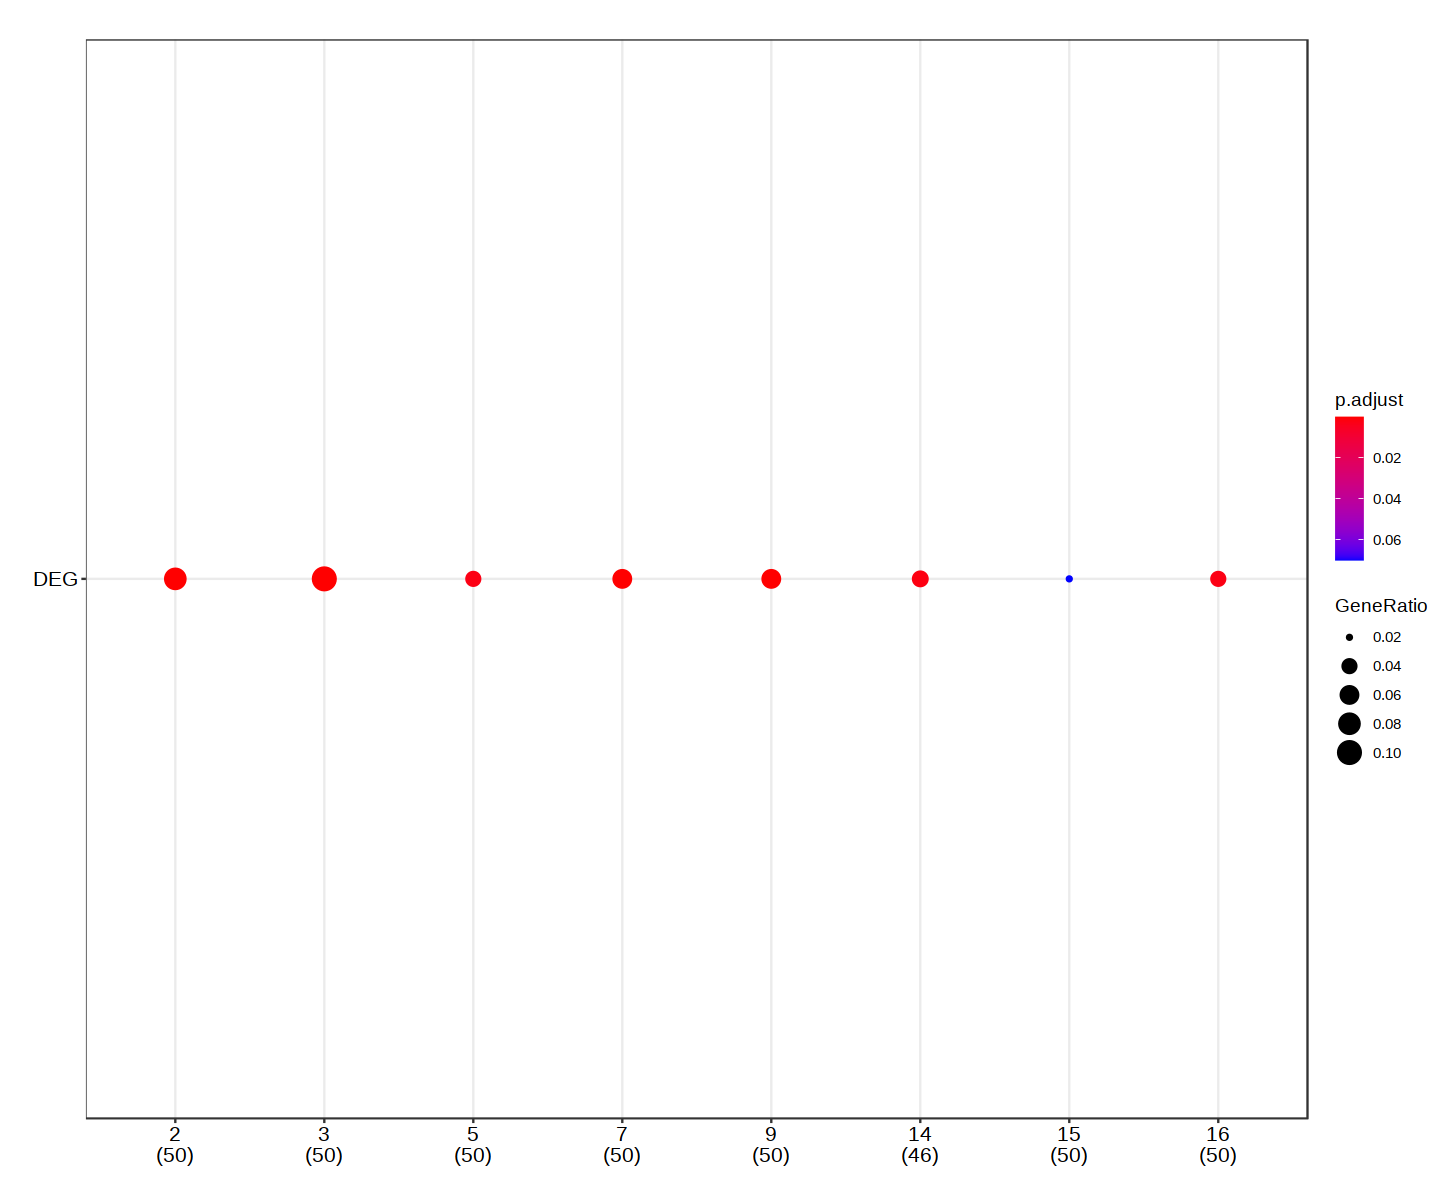

In [53]:
result <- compareCluster(gene~cluster, data=topX, fun="enricher",qvalueCutoff=0.5,pvalueCutoff=0.2,TERM2GENE=c)
options(repr.plot.width = 12, repr.plot.height = 10)
dotplot(result)

In [54]:
library(enrichplot)

In [56]:
head(result)

,Cluster,cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<int>
1,2,2,DEG,DEG,4/50,45/31057,8.433706e-07,8.433706e-07,NA,Gcnt2/Cd74/Vldlr/Meis1,4
2,3,3,DEG,DEG,5/50,45/31057,1.024713e-08,1.024713e-08,NA,Cd74/Pdzk1ip1/Meis1/Tgm2/Gcnt2,5
3,5,5,DEG,DEG,2/50,45/31057,2.405947e-03,2.405947e-03,NA,Slc14a1/Meis1,2
4,7,7,DEG,DEG,3/50,45/31057,5.311997e-05,5.311997e-05,NA,Tgm2/Pdzk1ip1/Meis1,3
5,9,9,DEG,DEG,3/50,45/31057,5.311997e-05,5.311997e-05,NA,Cd74/Gcnt2/Meis1,3
6,14,14,DEG,DEG,2/46,45/31057,2.040271e-03,2.040271e-03,NA,Vldlr/Pdzk1ip1,2


In [67]:
result=mutate(result,qscore=-log(p.adjust, base=10))

In [68]:
head(result)

,Cluster,cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,qscore
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<int>,<dbl>
1,2,2,DEG,DEG,4/50,45/31057,8.433706e-07,8.433706e-07,NA,Gcnt2/Cd74/Vldlr/Meis1,4,6.073982
2,3,3,DEG,DEG,5/50,45/31057,1.024713e-08,1.024713e-08,NA,Cd74/Pdzk1ip1/Meis1/Tgm2/Gcnt2,5,7.989398
3,5,5,DEG,DEG,2/50,45/31057,2.405947e-03,2.405947e-03,NA,Slc14a1/Meis1,2,2.618714
4,7,7,DEG,DEG,3/50,45/31057,5.311997e-05,5.311997e-05,NA,Tgm2/Pdzk1ip1/Meis1,3,4.274742
5,9,9,DEG,DEG,3/50,45/31057,5.311997e-05,5.311997e-05,NA,Cd74/Gcnt2/Meis1,3,4.274742
6,14,14,DEG,DEG,2/46,45/31057,2.040271e-03,2.040271e-03,NA,Vldlr/Pdzk1ip1,2,2.690312


In [74]:
result = arrange(result, -qscore)

In [81]:
head(result,n=20)

,Cluster,cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,qscore
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<int>,<dbl>
1,3,3,DEG,DEG,5/50,45/31057,1.024713e-08,1.024713e-08,NA,Cd74/Pdzk1ip1/Meis1/Tgm2/Gcnt2,5,7.989398
2,2,2,DEG,DEG,4/50,45/31057,8.433706e-07,8.433706e-07,NA,Gcnt2/Cd74/Vldlr/Meis1,4,6.073982
3,7,7,DEG,DEG,3/50,45/31057,5.311997e-05,5.311997e-05,NA,Tgm2/Pdzk1ip1/Meis1,3,4.274742
4,9,9,DEG,DEG,3/50,45/31057,5.311997e-05,5.311997e-05,NA,Cd74/Gcnt2/Meis1,3,4.274742
5,14,14,DEG,DEG,2/46,45/31057,2.040271e-03,2.040271e-03,NA,Vldlr/Pdzk1ip1,2,2.690312
6,5,5,DEG,DEG,2/50,45/31057,2.405947e-03,2.405947e-03,NA,Slc14a1/Meis1,2,2.618714
7,16,16,DEG,DEG,2/50,45/31057,2.405947e-03,2.405947e-03,NA,Ccl5/Ahnak,2,2.618714
8,15,15,DEG,DEG,1/50,45/31057,6.998751e-02,6.998751e-02,NA,Ahnak,1,1.154979


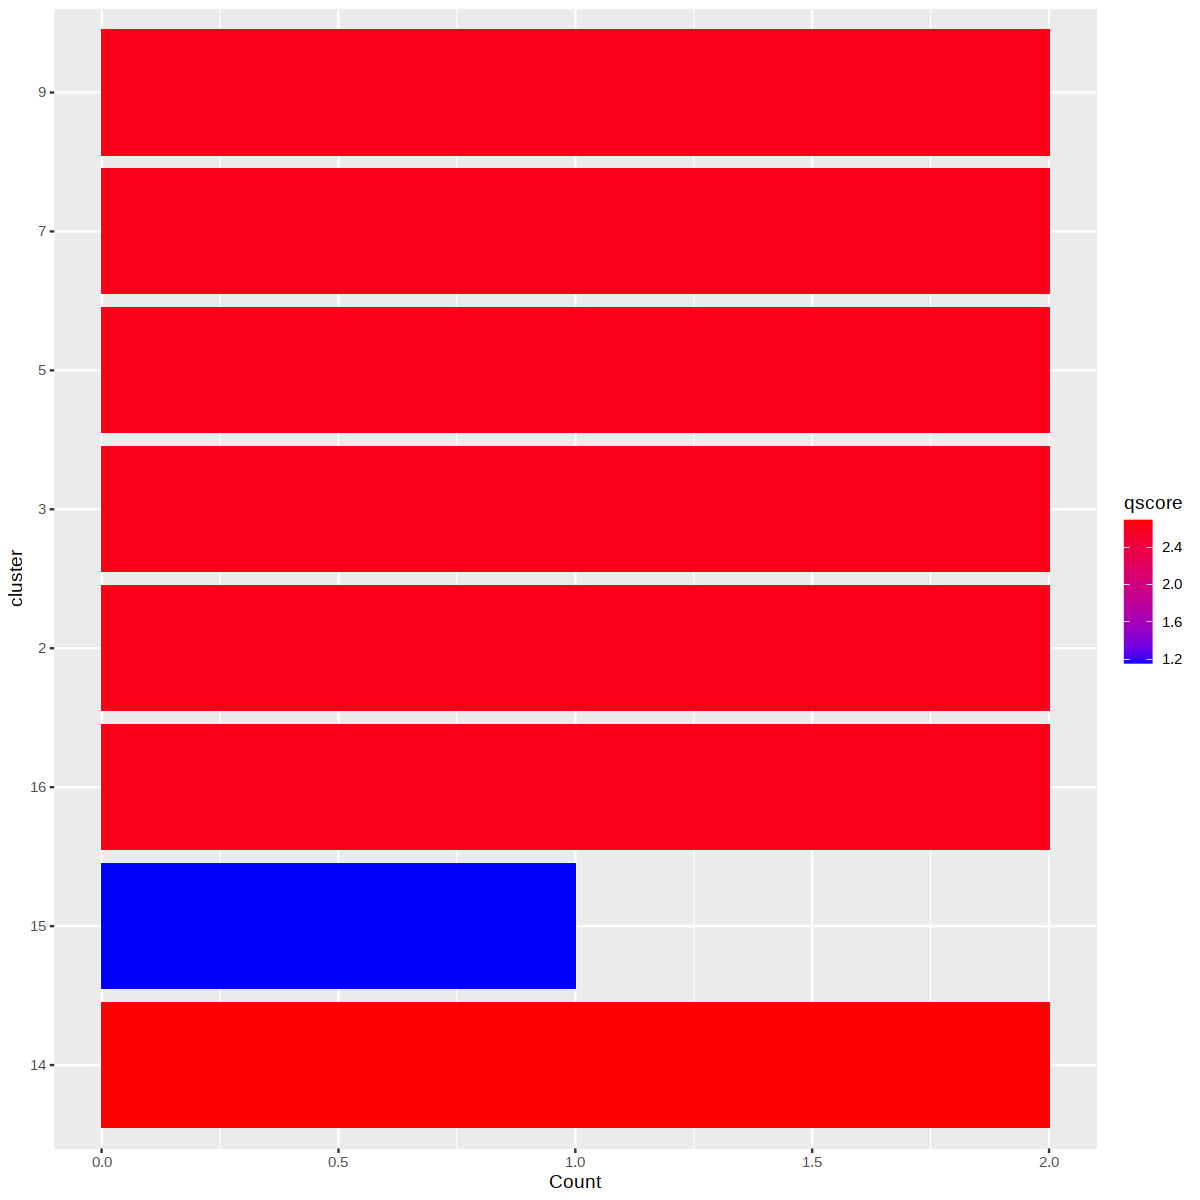

In [99]:
ggplot(data=result,aes(x=Count,y=cluster,fill=qscore))+geom_bar(stat="identity")+scale_fill_continuous(low="blue", high="red")

In [83]:
HSC=subset(x = merged_obj, idents  = c("2","3","7","9"))
head(HSC)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,percent.mt,RNA.weight,ADT.weight,wsnn_res.1,seurat_clusters,Blood_pred,BM_pred,Bone_pred,id
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
mWT_AAACCCAAGTGATCGG-1,mWT,3787,1690,103,7,5.307631,0.129729865,0.8702701,9,9,9,9,9,reference
mWT_AAACCCACAAACCATC-1,mWT,13420,3991,284,8,3.204173,0.040801805,0.9591982,3,3,3,Hematopoietic Stem Cell,3,reference
mWT_AAACCCACAGCCATTA-1,mWT,11463,3649,180,8,2.852656,0.118308303,0.8816917,9,9,9,9,9,reference
mWT_AAACCCATCTGTCCCA-1,mWT,4328,1881,58,7,4.875231,0.131311467,0.8686885,2,2,2,Hematopoietic Stem Cell,Hematopoietic Stem Cell,reference
mWT_AAACGAATCGAAGGAC-1,mWT,3817,1681,129,8,5.789887,0.218265923,0.7817341,2,2,2,Hematopoietic Stem Cell,Hematopoietic Stem Cell,reference
mWT_AAACGAATCGGCTTCT-1,mWT,2896,1274,107,7,5.352210,0.140741945,0.8592581,9,9,9,9,9,reference
mWT_AAACGCTCAAGTGACG-1,mWT,4721,1961,114,8,5.994493,0.042580206,0.9574198,2,2,2,Hematopoietic Stem Cell,Hematopoietic Stem Cell,reference
mWT_AAAGAACAGGAAAGGT-1,mWT,3803,1640,161,8,6.021562,0.002434168,0.9975658,2,2,2,Hematopoietic Stem Cell,Hematopoietic Stem Cell,reference
mWT_AAAGGATTCACCACAA-1,mWT,5210,2082,46,8,5.239923,0.081846468,0.9181535,2,2,2,Hematopoietic Stem Cell,Hematopoietic Stem Cell,reference


In [84]:
options(repr.plot.width = 10, repr.plot.height = 10)
markers2 <- FindAllMarkers(HSC, min.pct = 0.2, logfc.threshold = 0.2,test.use="wilcox")


Calculating cluster 2

Calculating cluster 3

Calculating cluster 7

Calculating cluster 9



ERROR: Error in corrplot(cor.exp, method = "number", is.corr = FALSE, col = rev(brewer.pal(n = 10, : could not find function "corrplot"


In [85]:
head(markers2)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Wfdc17,8.151739e-102,1.1314281,0.356,0.100,2.531359e-97,2,Wfdc17
H2afy,1.592893e-101,0.7881931,0.935,0.898,4.946411e-97,2,H2afy
Cd34,3.769291e-95,0.7654281,0.651,0.380,1.170478e-90,2,Cd34
Flt3,9.976010e-84,0.6416433,0.326,0.097,3.097850e-79,2,Flt3
Ramp1,2.184882e-80,0.6177680,0.858,0.722,6.784714e-76,2,Ramp1
Aldh1a1,2.021345e-79,-0.6234296,0.094,0.354,6.276883e-75,2,Aldh1a1


In [91]:
sub_markers1 = subset(x = markers,  !(cluster %in% c(2,3,7,9)))

In [92]:
unique(sub_markers1$cluster)

[1] 0  1  4  5  6  8  10 11 12 13 14 15 16
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16

In [93]:
total_markers=rbind(sub_markers1,markers2)

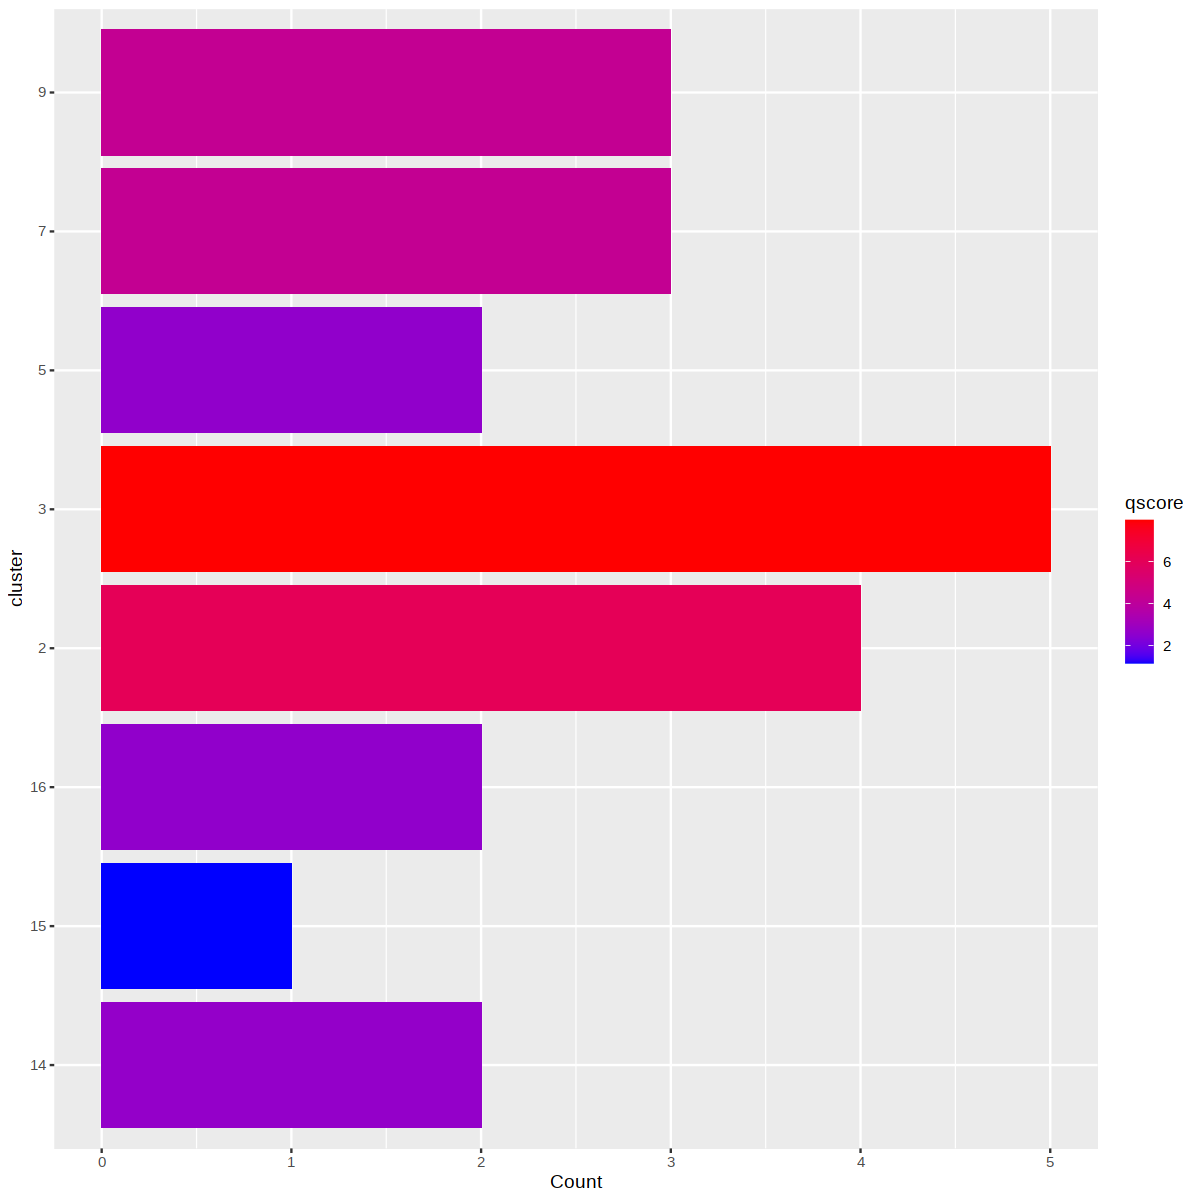

In [101]:
n=50
topX = markers %>%
    group_by(cluster) %>%
    top_n(n = n, wt = avg_log2FC)
result <- compareCluster(gene~cluster, data=topX, fun="enricher",qvalueCutoff=1,pvalueCutoff=1,TERM2GENE=c)
result=mutate(result,qscore=-log(p.adjust, base=10))
ggplot(data=result,aes(x=Count,y=cluster,fill=qscore))+geom_bar(stat="identity")+scale_fill_continuous(low="blue", high="red")

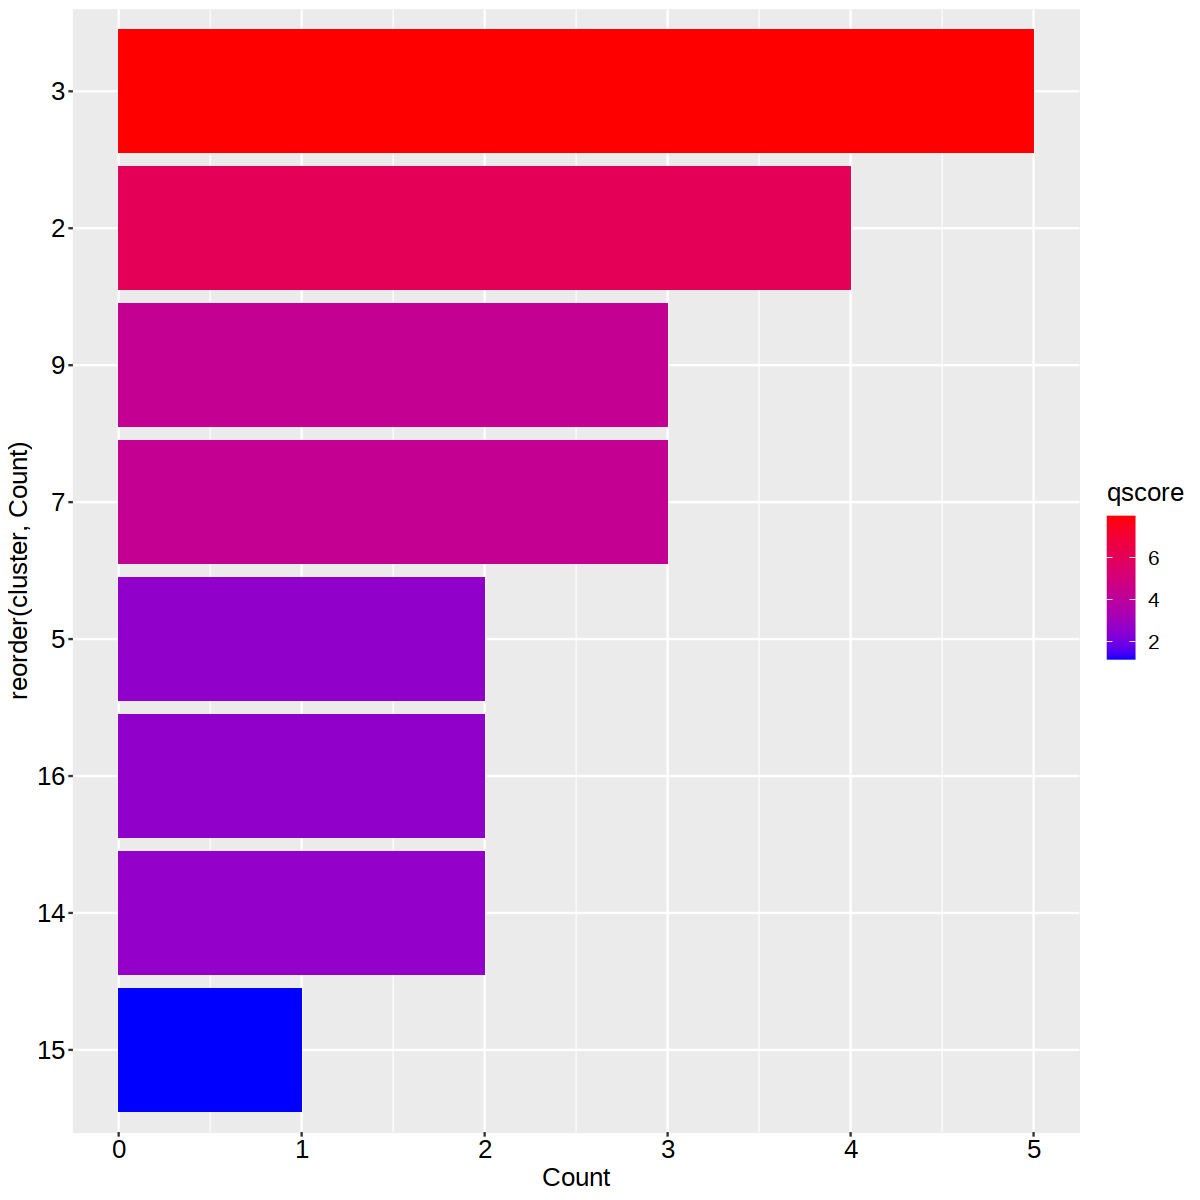

In [113]:
ggplot(data=result,aes(x=Count,y=reorder(cluster,Count),fill=qscore))+geom_bar(stat="identity")+scale_fill_continuous(low="blue", high="red")+
theme(axis.text = element_text(face="plain", color="black", 
                           size=15, angle=0),text = element_text(face="plain", color="black", 
                           size=15, angle=0))
ggsave("DEG_overlap_marker_genes_top50.pdf",height=3,width=4)

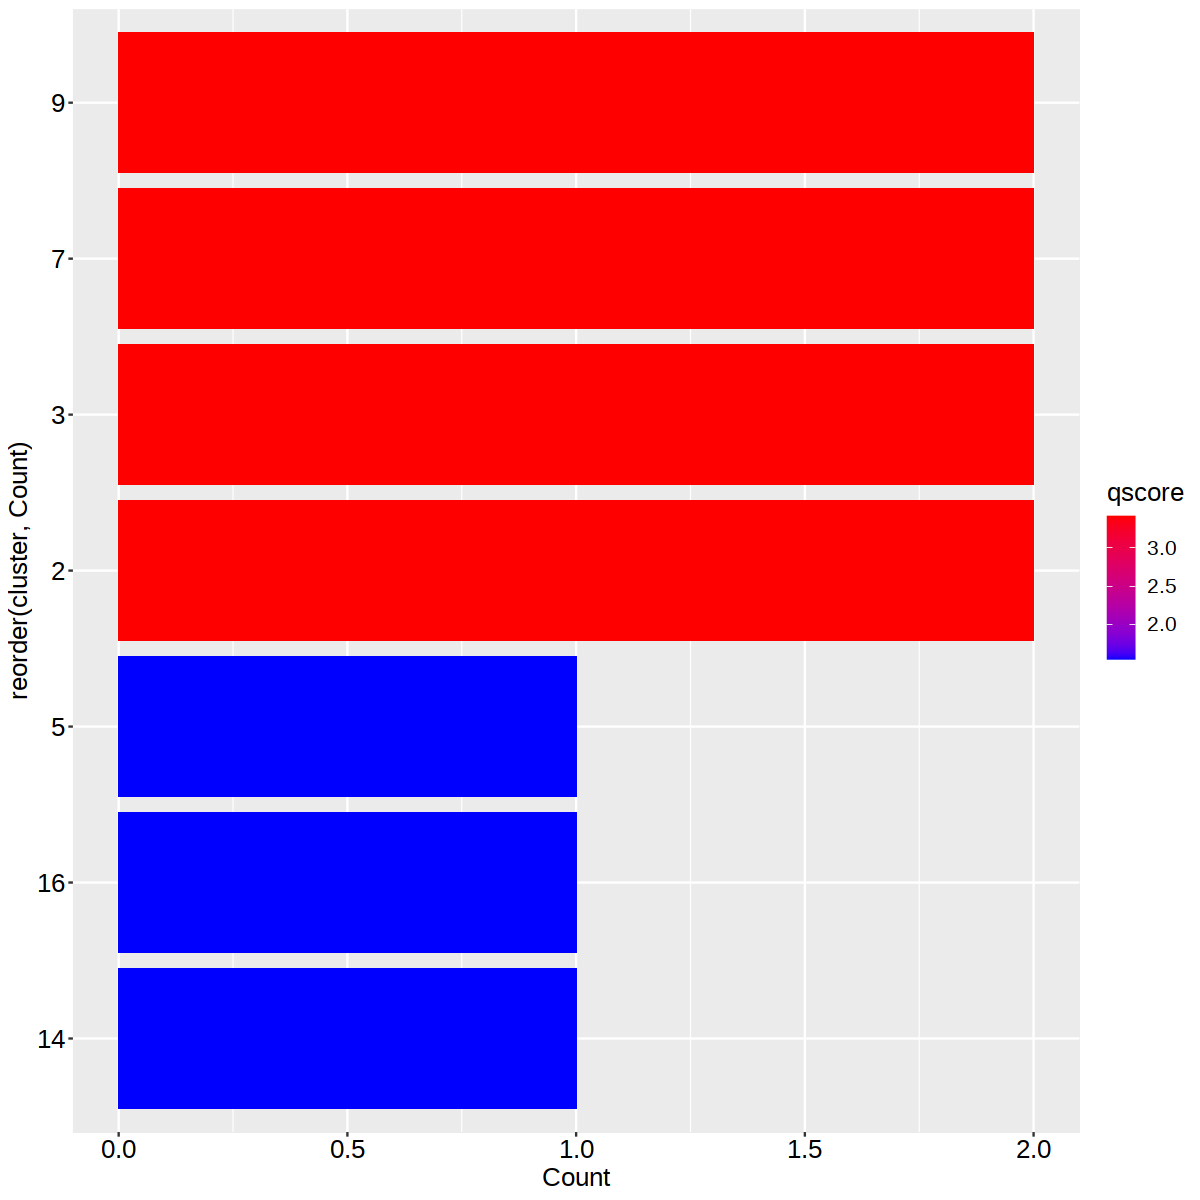

In [114]:
n=20
topX = markers %>%
    group_by(cluster) %>%
    top_n(n = n, wt = avg_log2FC)
result <- compareCluster(gene~cluster, data=topX, fun="enricher",qvalueCutoff=1,pvalueCutoff=1,TERM2GENE=c)
result=mutate(result,qscore=-log(p.adjust, base=10))
ggplot(data=result,aes(x=Count,y=reorder(cluster,Count),fill=qscore))+geom_bar(stat="identity")+scale_fill_continuous(low="blue", high="red")+
theme(axis.text = element_text(face="plain", color="black", 
                           size=15, angle=0),text = element_text(face="plain", color="black", 
                           size=15, angle=0))
ggsave("DEG_overlap_marker_genes_top20.pdf",height=3,width=4)

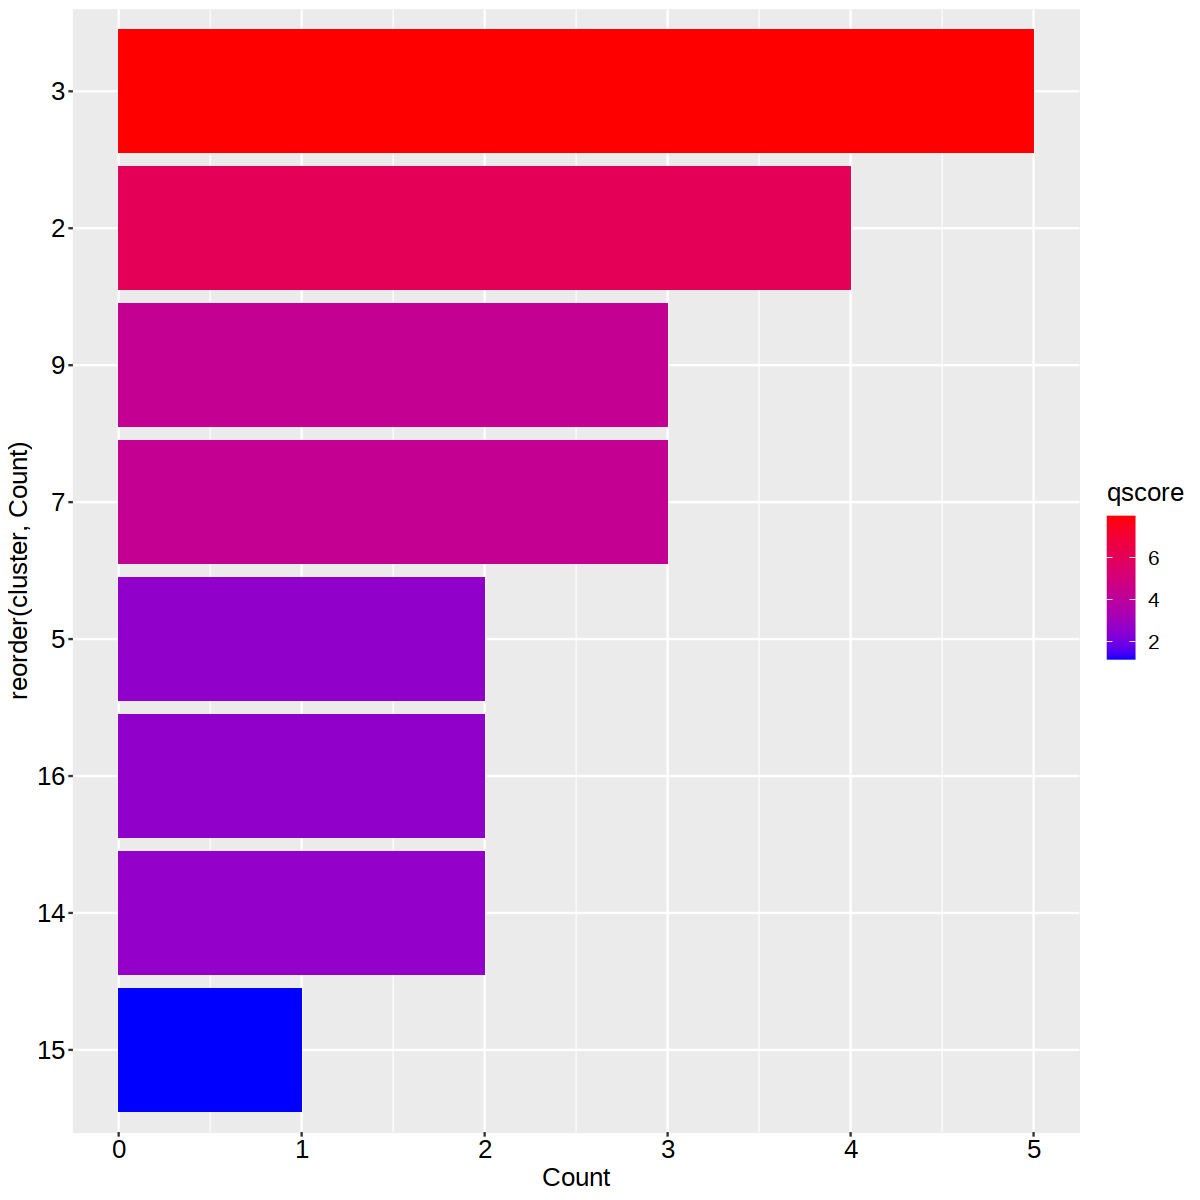

In [118]:
n=50
topX = markers %>%
    group_by(cluster) %>%
    top_n(n = n, wt = avg_log2FC)
result <- compareCluster(gene~cluster, data=topX, fun="enricher",qvalueCutoff=1,pvalueCutoff=1,TERM2GENE=c)
result=mutate(result,qscore=-log(p.adjust, base=10))
ggplot(data=result,aes(x=Count,y=reorder(cluster,Count),fill=qscore))+geom_bar(stat="identity")+scale_fill_continuous(low="blue", high="red")+
theme(axis.text = element_text(face="plain", color="black", 
                           size=15, angle=0),text = element_text(face="plain", color="black", 
                           size=15, angle=0))


In [120]:
write.table(result,"DEG_overlap.top50.csv",sep=",")

In [121]:
head(result)

,Cluster,cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,qscore
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<int>,<dbl>
1,2,2,DEG,DEG,4/50,45/31057,8.433706e-07,8.433706e-07,NA,Gcnt2/Cd74/Vldlr/Meis1,4,6.073982
2,3,3,DEG,DEG,5/50,45/31057,1.024713e-08,1.024713e-08,NA,Cd74/Pdzk1ip1/Meis1/Tgm2/Gcnt2,5,7.989398
3,5,5,DEG,DEG,2/50,45/31057,2.405947e-03,2.405947e-03,NA,Slc14a1/Meis1,2,2.618714
4,7,7,DEG,DEG,3/50,45/31057,5.311997e-05,5.311997e-05,NA,Tgm2/Pdzk1ip1/Meis1,3,4.274742
5,9,9,DEG,DEG,3/50,45/31057,5.311997e-05,5.311997e-05,NA,Cd74/Gcnt2/Meis1,3,4.274742
6,14,14,DEG,DEG,2/46,45/31057,2.040271e-03,2.040271e-03,NA,Vldlr/Pdzk1ip1,2,2.690312


In [122]:
length(target_genes)

[1] 51

In [124]:
devtools::install_github("xmc811/Scillus", ref = "development")


Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom




pillar       (1.6.1   -> 1.6.2 ) [CRAN]
tibble       (3.1.3   -> 3.1.4 ) [CRAN]
R6           (2.5.0   -> 2.5.1 ) [CRAN]
RcppAnnoy    (0.0.18  -> 0.0.19) [CRAN]
cachem       (1.0.5   -> 1.0.6 ) [CRAN]
later        (1.2.0   -> 1.3.0 ) [CRAN]
htmltools    (0.5.1.1 -> 0.5.2 ) [CRAN]
httpuv       (1.6.1   -> 1.6.2 ) [CRAN]
stringi      (1.7.3   -> 1.7.4 ) [CRAN]
matrixStats  (0.60.0  -> 0.60.1) [CRAN]
future       (1.21.0  -> 1.22.1) [CRAN]
future.apply (1.7.0   -> 1.8.1 ) [CRAN]
xfun         (0.24    -> 0.25  ) [CRAN]
tinytex      (0.32    -> 0.33  ) [CRAN]
BiocGenerics (0.36.0  -> 0.36.1) [CRAN]
rmarkdown    (2.9     -> 2.10  ) [CRAN]
Seurat       (4.0.3   -> 4.0.4 ) [CRAN]
formattable  (NA      -> 0.2.1 ) [CRAN]


Installing 18 packages: pillar, tibble, R6, RcppAnnoy, cachem, later, htmltools, httpuv, stringi, matrixStats, future, future.apply, xfun, tinytex, BiocGenerics, rmarkdown, Seurat, formattable



v  checking for file '/research/rgs01/scratch_lsf/lsftmpdir/noderome226/137683109_1.tmpdir/RtmprHoZMI/remotes1e8113051ff/xmc811-Scillus-4e7884d/DESCRIPTION' (545ms)
-  preparing 'Scillus':
v  checking DESCRIPTION meta-information
-  checking for LF line-endings in source and make files and shell scripts
-  checking for empty or unneeded directories
   Removed empty directory 'Scillus/test'
-  building 'Scillus_0.5.0.tar.gz'
   


In [123]:
save.image("8_31_marker_genes_and_DEG_overlap.RData")